In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

file_path = '/content/drive/MyDrive/dataset/Kaggle/marketing_campaign.csv'
df = pd.read_csv(file_path, sep=';')

# Now you can work with the DataFrame 'df'
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
df.shape

(2240, 29)

# Data Cleaning

In [5]:
# Removing duplicates from the DataFrame
df_clean = df.drop_duplicates()
print("Data shape after removing duplicates: ", df_clean.shape)

Data shape after removing duplicates:  (2240, 29)


In [6]:
df = df_clean

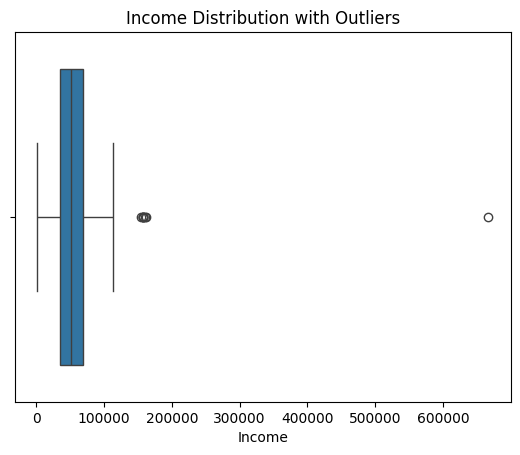

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing outliers using a boxplot for 'Income'
sns.boxplot(x=df['Income'])
plt.title('Income Distribution with Outliers')
plt.show()

Data shape after removing outliers:  (2208, 29)


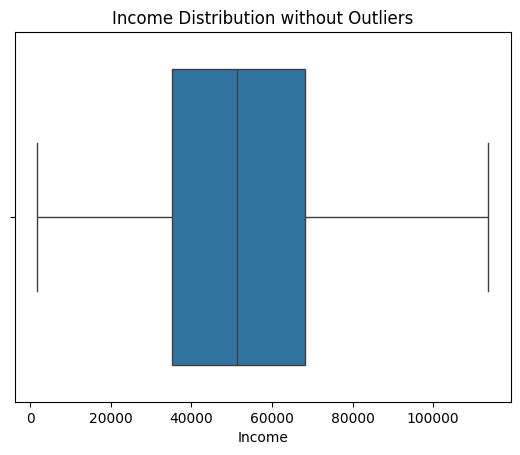

In [8]:
# Removing outliers using IQR method for 'Income'
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
df_outliers_removed = df[(df['Income'] >= (Q1 - 1.5 * IQR)) & (df['Income'] <= (Q3 + 1.5 * IQR))]

print("Data shape after removing outliers: ", df_outliers_removed.shape)

sns.boxplot(x=df_outliers_removed['Income'])
plt.title('Income Distribution without Outliers')
plt.show()

# Handling Missing Data

In [9]:
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [10]:
# Imputing missing Income values using the median
df['Income'] = df['Income'].fillna(df['Income'].median())
print("Missing values after imputation:\n", df.isnull().sum())

Missing values after imputation:
 ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


In [11]:
# Dropping rows with missing values
df = df.dropna()
print(df)

         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  2012-09-04       58       635  ...            

# Feature Engineering

In [12]:
# One-hot encoding the 'Education' categorical variable
df = pd.get_dummies(df, columns=['Education'])
print(df.head())

     ID  Year_Birth Marital_Status   Income  Kidhome  Teenhome Dt_Customer  \
0  5524        1957         Single  58138.0        0         0  2012-09-04   
1  2174        1954         Single  46344.0        1         1  2014-03-08   
2  4141        1965       Together  71613.0        0         0  2013-08-21   
3  6182        1984       Together  26646.0        1         0  2014-02-10   
4  5324        1981        Married  58293.0        1         0  2014-01-19   

   Recency  MntWines  MntFruits  ...  AcceptedCmp2  Complain  Z_CostContact  \
0       58       635         88  ...             0         0              3   
1       38        11          1  ...             0         0              3   
2       26       426         49  ...             0         0              3   
3       26        11          4  ...             0         0              3   
4       94       173         43  ...             0         0              3   

   Z_Revenue  Response  Education_2n Cycle  Education_Ba

In [13]:
from sklearn.preprocessing import StandardScaler

# Standardizing 'Income' and 'Recency'
scaler = StandardScaler()
df[['Income', 'Recency']] = scaler.fit_transform(df[['Income', 'Recency']])
print(df.head())

     ID  Year_Birth Marital_Status    Income  Kidhome  Teenhome Dt_Customer  \
0  5524        1957         Single  0.235696        0         0  2012-09-04   
1  2174        1954         Single -0.235454        1         1  2014-03-08   
2  4141        1965       Together  0.773999        0         0  2013-08-21   
3  6182        1984       Together -1.022355        1         0  2014-02-10   
4  5324        1981        Married  0.241888        1         0  2014-01-19   

    Recency  MntWines  MntFruits  ...  AcceptedCmp2  Complain  Z_CostContact  \
0  0.307039       635         88  ...             0         0              3   
1 -0.383664        11          1  ...             0         0              3   
2 -0.798086       426         49  ...             0         0              3   
3 -0.798086        11          4  ...             0         0              3   
4  1.550305       173         43  ...             0         0              3   

   Z_Revenue  Response  Education_2n Cycle  

# Exploratory Data Analysis (EDA)

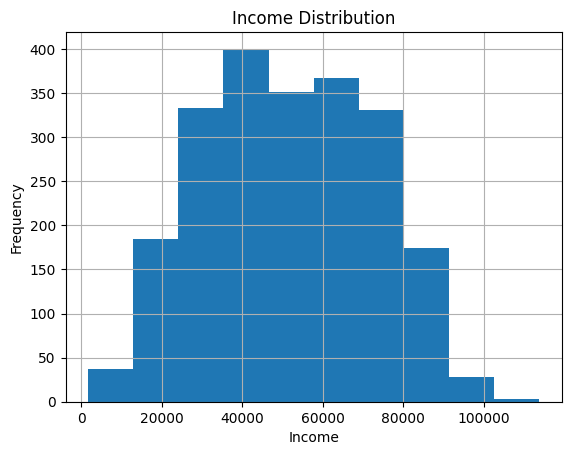

In [14]:
# Histogram for the 'Income' variable
df_outliers_removed['Income'].hist(bins=10)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

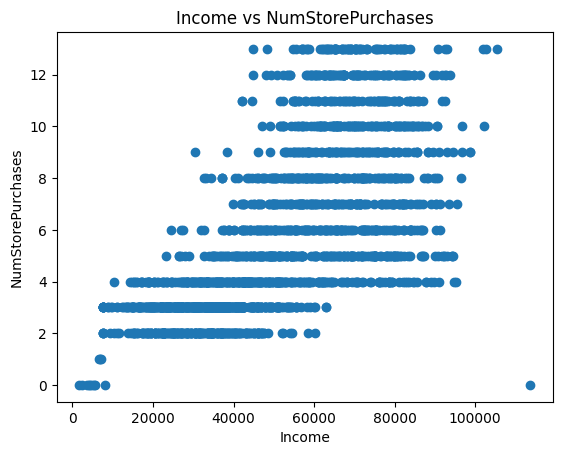

In [15]:
# Scatter plot to examine the relationship between Income and NumStorePurchases
plt.scatter(df_outliers_removed['Income'], df_outliers_removed['NumStorePurchases'])
plt.title('Income vs NumStorePurchases')
plt.xlabel('Income')
plt.ylabel('NumStorePurchases')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 30.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 37.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


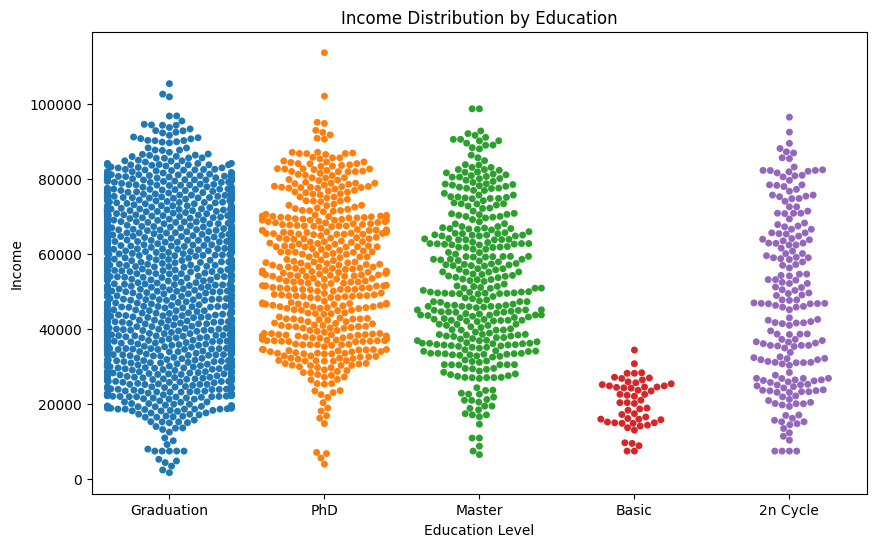

In [16]:
# Beeswarm plot for 'Income' by 'Education' level
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Education', y='Income', data=df_outliers_removed, hue='Education')
plt.title('Income Distribution by Education')
plt.xlabel('Education Level')
plt.ylabel('Income')
plt.show()

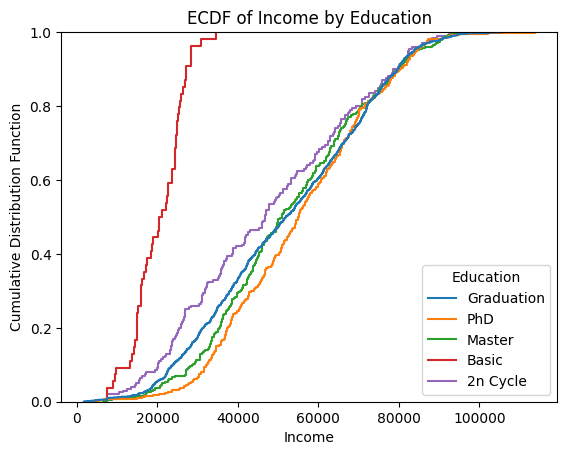

In [17]:
# ECDF plot for 'Income' by 'Education'
sns.ecdfplot(data=df_outliers_removed, x='Income', hue='Education')
plt.title('ECDF of Income by Education')
plt.xlabel('Income')
plt.ylabel('Cumulative Distribution Function')
plt.show()

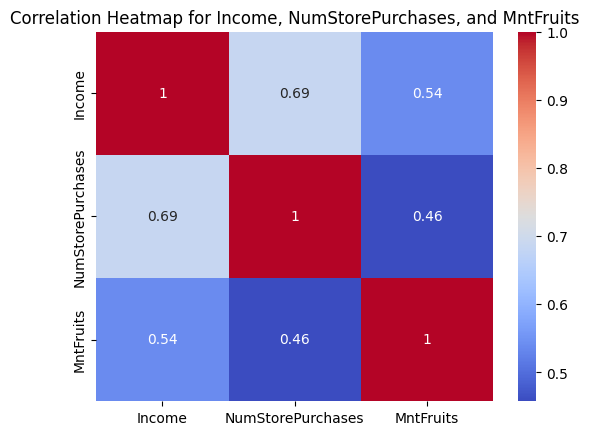

In [18]:
# Correlation heatmap for key variables
corr = df_outliers_removed[['Income', 'NumStorePurchases', 'MntFruits']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Income, NumStorePurchases, and MntFruits')
plt.show()

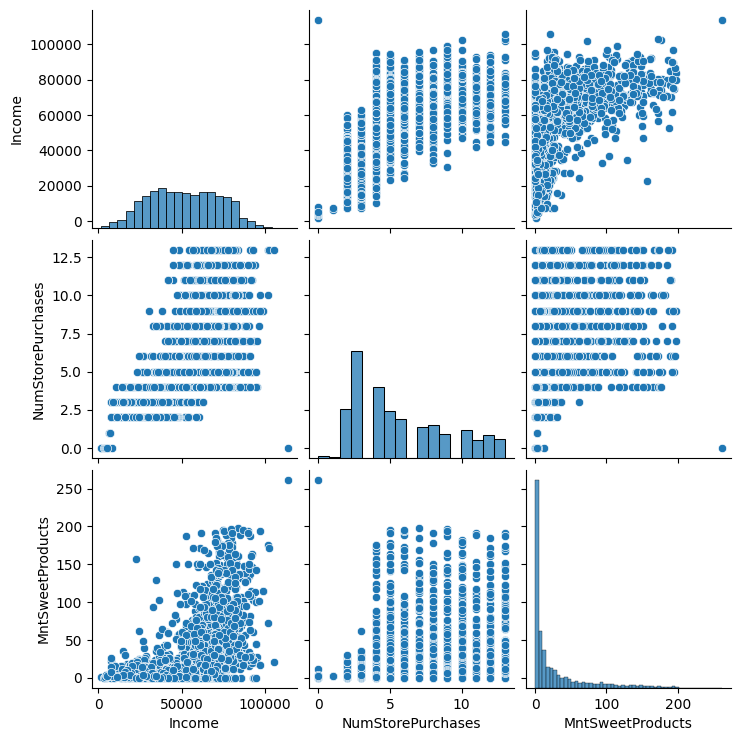

In [19]:
# Creating a pairplot for Income, NumStorePurchases, and MntSweetProducts
sns.pairplot(df_outliers_removed[['Income', 'NumStorePurchases', 'MntSweetProducts']])
plt.show()